In [1]:
#https://scanpy-tutorials.readthedocs.io/en/latest/paga-paul15.html
import scanpy as sc
import scirpy as ir
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pl

from matplotlib import rcParams

In [2]:
latent_path='../preprocessing/hmgu_data_preproc/11_latent_moe.h5ad'
adata = sc.read(latent_path)


In [3]:
adata

AnnData object with n_obs × n_vars = 10954 × 10
    obs: 'batch', 'Sample', 'donor', 'organ', 'sort', 'method', 'file', 'is_TRA_p', 'is_TRB_p', 'is_TRA_np', 'is_TRB_np', 'Age', 'Source', 'cell types', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'multi_chain', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_jun

In [4]:
adata.obs.groupby('Source')['Age'].value_counts()

Source     Age
HDBR       14w    1459
           17w    1378
           11w     947
           13w     940
           12w     848
           16w     565
Newcastle  30m    3349
           10m     477
nan        nan     991
Name: Age, dtype: int64

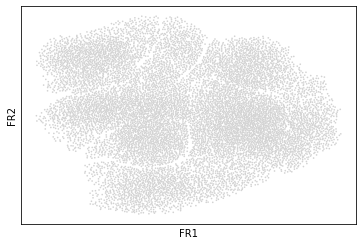

In [5]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, legend_loc='on data')

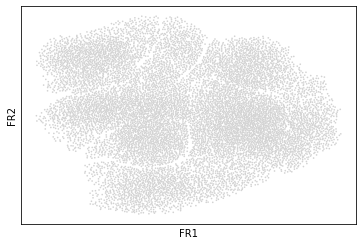

In [6]:
#optional denoising
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')
sc.pl.draw_graph(adata, legend_loc='on data')
#end optional denoising
sc.tl.draw_graph(adata)

In [7]:
sc.tl.leiden(adata, resolution=1.0)
sc.tl.paga(adata, groups='leiden')

ValueError: Expected `colors` to be of length `51`, found `3`.

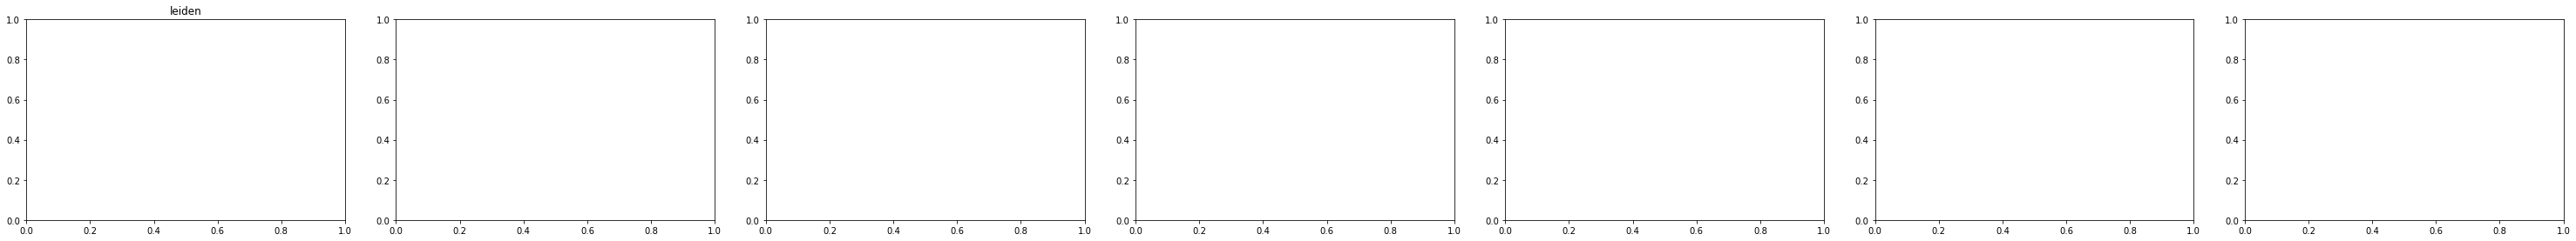

In [8]:
sc.pl.paga(adata, color=['leiden', 'TMSB4X','B2M','RPS27','IL7R', 'CD8A','Age'])

In [9]:
adata.obs['leiden'].cat.categories


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50'],
      dtype='object')

In [10]:
adata.obs['leiden_anno'] = adata.obs['leiden']


In [11]:
adata.obs['leiden_anno'].cat.categories =['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50']

<Axes:>

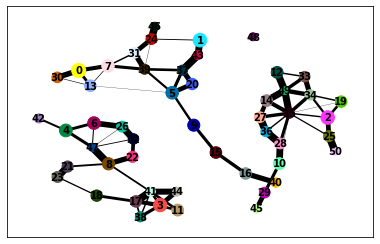

In [12]:
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03, show=False)

KeyError: 'Could not find key IL7R in .var_names or .obs.columns.'

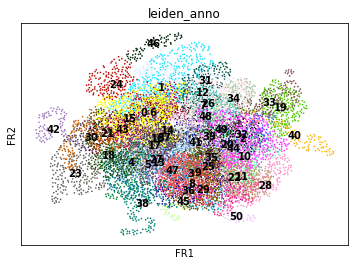

In [13]:
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['leiden_anno', 'IL7R', 'CD8A'], legend_loc='on data')

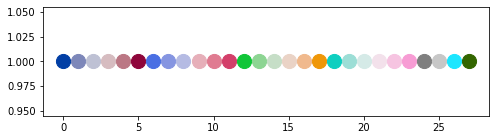

In [14]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()


#error skipping recoloring for now

In [15]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == '1')[0]
sc.tl.dpt(adata)
#Select some of the marker gene names.
gene_names = ['IL7R', 'CD8A']  

In [16]:
adata_raw = sc.read(latent_path)
adata.raw = adata_raw

In [17]:
"""
to avoid that, you can look up, where neighbors and distances are stored in the adata object 
(for that print keys from adata.uns, adata.obsm, adata.obsp)
and remove everything that looks like it could be ralted to neighbors.
"""
print(adata.uns.keys())
print(adata.obsm.keys())
print(adata.obsp.keys())

del adata.uns['neighbors']
del adata.uns['draw_graph']
print(adata.uns.keys())

del adata.obsm['X_draw_graph_fr']
del adata.obsm['X_diffmap']
print(adata.obsm.keys())

dict_keys(['Age_colors', 'Sample_colors', 'Source_colors', 'batch_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap', 'draw_graph', 'diffmap_evals', 'paga', 'leiden_sizes', 'leiden_anno_sizes', 'leiden_anno_colors', 'iroot'])
KeysView(AxisArrays with keys: X_umap, X_draw_graph_fr, X_diffmap)
KeysView(PairwiseArrays with keys: connectivities, distances)
dict_keys(['Age_colors', 'Sample_colors', 'Source_colors', 'batch_colors', 'leiden', 'leiden_colors', 'umap', 'diffmap_evals', 'paga', 'leiden_sizes', 'leiden_anno_sizes', 'leiden_anno_colors', 'iroot'])
KeysView(AxisArrays with keys: X_umap)


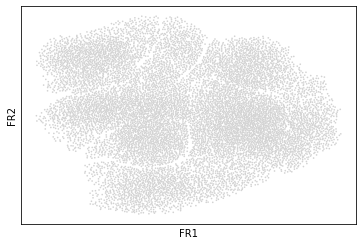

In [18]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

sc.tl.diffmap(adata)
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, legend_loc='on data')
sc.tl.umap(adata)


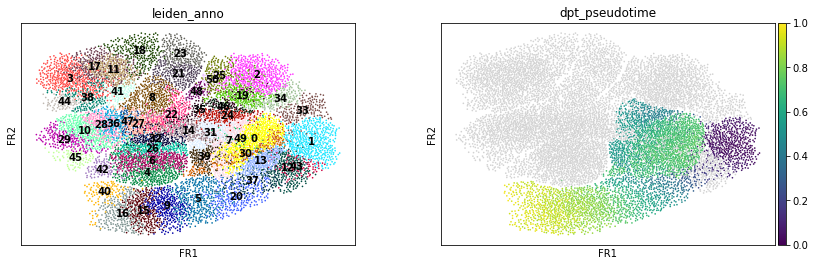

In [19]:
sc.pl.draw_graph(adata, color=['leiden_anno', 'dpt_pseudotime'], legend_loc='on data')


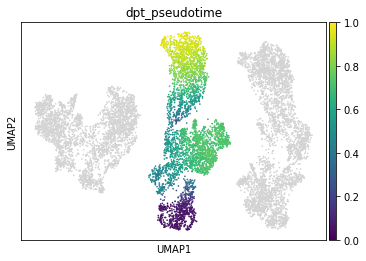

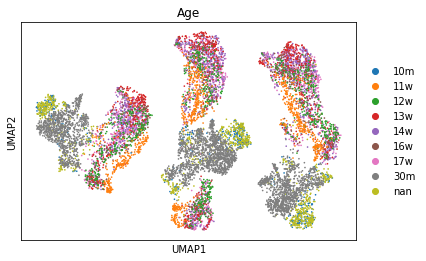

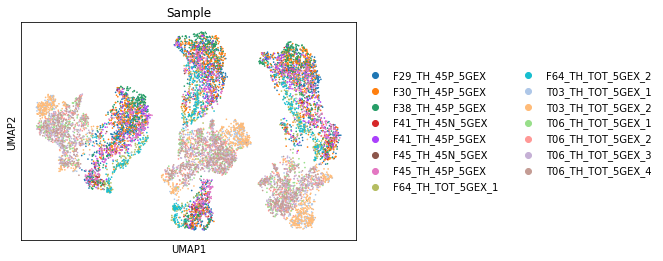

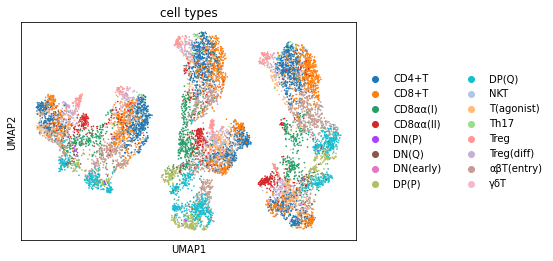

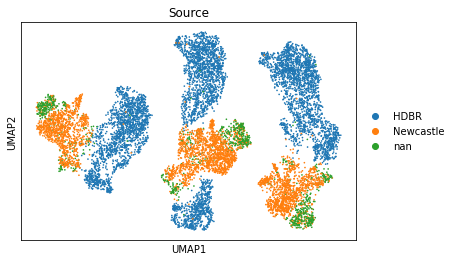

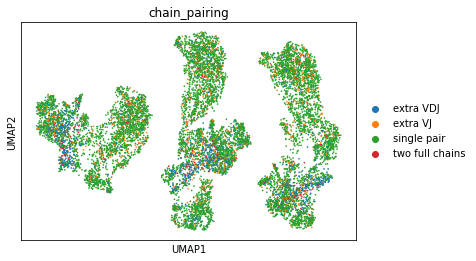

In [20]:
sc.pl.umap(adata, color=['dpt_pseudotime'])
sc.pl.umap(adata, color=['Age'])
sc.pl.umap(adata, color=['Sample'])
sc.pl.umap(adata, color=['cell types'])
sc.pl.umap(adata, color=['Source'])
sc.pl.umap(adata, color=['chain_pairing'])


In [21]:
"""paths = [('erythrocytes', [16, 12, 7, 13, 18, 6, 5, 10]),
         ('neutrophils', [16, 0, 4, 2, 14, 19]),
         ('monocytes', [16, 0, 4, 11, 1, 9, 24])]
         """

paths = [('1cluster', [28,36,17,29,23,20,2,30]),
         ('2cluster', [13,21,32,0,5,3,26,15,22,10,7,39]),
         ('3cluster', [27,33,38,11,1,8,6,4,35,34,12,37,9,24,31,14,31,16,18,25])]

In [22]:
adata.obs['distance'] = adata.obs['dpt_pseudotime']

In [23]:
adata.obs['clusters'] = adata.obs['leiden_anno']  # just a cosmetic change

In [24]:
adata.uns['clusters_colors'] = adata.uns['leiden_anno_colors']

KeyError: 'IL7R'

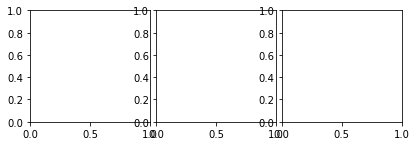

In [25]:
_, axs = pl.subplots(ncols=3, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    data.to_csv('./write/paga_path_{}.csv'.format(descr))
pl.show()

In [26]:
#adata.obs['Source']
hdbr = adata[adata.obs.Source =='HDBR', :]
newc= adata[adata.obs.Source =='Newcastle', :]


print(hdbr.obs['Age'])
#Name: Age, Length: 6137, dtype: category
#Categories (6, object): ['11w', '12w', '13w', '14w', '16w', '17w']
print(newc.obs['Age'])
#Name: Age, Length: 3826, dtype: category
#Categories (2, object): ['10m', '30m']

#adata.obs['leiden_anno']
for i in range(0,51):
    print(i)
    x=adata[adata.obs.leiden_anno ==str(i), :]
    print(x.obs['Age'])

#the two most promising for youngest cluster are cluster 36 with only 11 week data and cluster 23 with only 11 and 13 data
#we will set the root cluster as 36




index
FCAImmP7292030-AAACCTGGTACAGACG    17w
FCAImmP7292030-AAACCTGTCCCTTGTG    17w
FCAImmP7292030-AAACGGGTCAAGCCTA    17w
FCAImmP7292030-AAACGGGTCGACGGAA    17w
FCAImmP7292030-AAACGGGTCTTAACCT    17w
                                  ... 
FCAImmP7851891-TTTCCTCGTGCCTGGT    11w
FCAImmP7851891-TTTGGTTAGGTGCAAC    11w
FCAImmP7851891-TTTGGTTGTGTCGCTG    11w
FCAImmP7851891-TTTGTCAGTCACAAGG    11w
FCAImmP7851891-TTTGTCATCTCACATT    11w
Name: Age, Length: 6137, dtype: category
Categories (6, object): ['11w', '12w', '13w', '14w', '16w', '17w']
index
T03_TH_TOT_5GEX_1_S1-AAACCTGGTTATCGGT     10m
T03_TH_TOT_5GEX_1_S1-AAAGATGAGCTGATAA     10m
T03_TH_TOT_5GEX_1_S1-AAAGATGGTGCGCTTG     10m
T03_TH_TOT_5GEX_1_S1-AAAGATGTCCTGCAGG     10m
T03_TH_TOT_5GEX_1_S1-AAAGATGTCGCATGGC     10m
                                         ... 
T06_TH_TOT_5GEX_4_S12-TTTGGTTCACCAGTTA    30m
T06_TH_TOT_5GEX_4_S12-TTTGGTTCATCACAAC    30m
T06_TH_TOT_5GEX_4_S12-TTTGGTTGTACTTGAC    30m
T06_TH_TOT_5GEX_4_S12-TTTGTCAGTAATAGC

index
FCAImmP7292030-AACTCAGAGACACGAC          17w
FCAImmP7292030-AAGCCGCGTAGAGTGC          17w
FCAImmP7292030-ACACCCTAGGGTATCG          17w
FCAImmP7292030-ACACTGACATCCCATC          17w
FCAImmP7292030-ACAGCTATCGTACCGG          17w
                                        ... 
FCAImmP7851891-CTCGTCACACAGCCCA          11w
FCAImmP7851891-CTTAGGAAGTCTCAAC          11w
FCAImmP7851891-GTCCTCACAGCATGAG          11w
FCAImmP7851891-TGCGGGTCAGGTTTCA          11w
T06_TH_TOT_5GEX_1_S9-GATGCTAGTAACGTTC    30m
Name: Age, Length: 256, dtype: category
Categories (7, object): ['11w', '12w', '13w', '14w', '16w', '17w', '30m']
16
index
FCAImmP7292030-AAAGTAGGTTCCATGA    17w
FCAImmP7292030-AAGGAGCAGCTGCGAA    17w
FCAImmP7292030-ACACCGGGTACCCAAT    17w
FCAImmP7292030-ACAGCTAAGTAATCCC    17w
FCAImmP7292030-ACGAGCCAGAAGAAGC    17w
                                  ... 
FCAImmP7579231-TCAGCAAGTGTAATGA    12w
FCAImmP7579231-TGCTGCTTCCATGCTC    12w
FCAImmP7851890-CATATGGGTGTTCTTT    11w
FCAImmP7851890-TCATTTGTCC

index
FCAImmP7292030-AACTGGTTCATGTCTT           17w
FCAImmP7292030-AGAATAGGTATGGTTC           17w
FCAImmP7292030-ATAGACCGTAACGTTC           17w
FCAImmP7292030-TGGGAAGGTCCCTTGT           17w
T03_TH_TOT_5GEX_1_S1-AAGCCGCGTGCTTCTC     10m
                                         ... 
T06_TH_TOT_5GEX_4_S12-TGACTTTTCATACGGT    30m
T06_TH_TOT_5GEX_4_S12-TGAGCATAGTTAGCGG    30m
T06_TH_TOT_5GEX_4_S12-TGTATTCAGCTAAACA    30m
T06_TH_TOT_5GEX_4_S12-TTAACTCAGTATGACA    30m
T06_TH_TOT_5GEX_4_S12-TTGCCGTGTGTCCTCT    30m
Name: Age, Length: 172, dtype: category
Categories (4, object): ['10m', '17w', '30m', 'nan']
34
index
T03_TH_TOT_5GEX_1_S1-ACTTACTTCCACGAAT     10m
T03_TH_TOT_5GEX_1_S1-AGAGTGGCACAAGCCC     10m
T03_TH_TOT_5GEX_1_S1-ATCATGGTCGGAAACG     10m
T03_TH_TOT_5GEX_1_S1-ATTGGACGTTAGAACA     10m
T03_TH_TOT_5GEX_1_S1-CAGCTAATCTTGTTTG     10m
                                         ... 
T06_TH_TOT_5GEX_4_S12-TACGGATGTGAGGGTT    30m
T06_TH_TOT_5GEX_4_S12-TACTCGCCACAGATTC    30m
T06_TH_TOT_5GEX_4_